# 다양한 요소들이 수면에 미치는 영향  
수면의 질을 결정짓는 요인은 무엇인가 ?
## 1. 기획 의도 및 분석 목적


이 프로젝트는 개인의 수면 질을 결정하는 핵심 요인을 파악하는 것을 목표로 합니다. 특히 수면장애 유무 및 유형, 스트레스 수준, 그리고 수면 시간과 같은 변수들이 개인의 수면의 질을 결정하는 데 얼마나 중요한 역할을 하는지 분석하고자 합니다.  
현대인의 건강과 삶의 질에 영향을 미치는 수면장애는 스트레스와 깊은 관련성을 가집니다. 이 프로젝트에서는 파이썬을 활용한 데이터 분석을 함으로써, 수면장애 유형별(예: 불면증, 수면무호흡증)로 수면 시간, 수면의 질, 스트레스 수준 간의 분포와 상관관계를 심층적으로 탐색하는 것을 목표로 합니다.

## 2. 데이터 설명
본 프로젝트에서 사용된 데이터는 Kaggle의 ‘Sleep and Lifestyle Dataset’을 기반으로 하였습니다. 주요 변수는 다음과 같습니다.  
- 수면장애 유형 {Insomnia(불면증), Sleep Apnea(수면 무호흡)}
- 수면 시간 (Sleep Duration)  
- 수면 질 (Quality)  
- 스트레스 수준 (Stress Level)  
- 직업군 (Occupation)  
- 인원 수 (Count)  

### 데이터 셋팅 및 확인하기
  
  
  
  
  
  
  
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
life_sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
life_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
life_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
life_sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


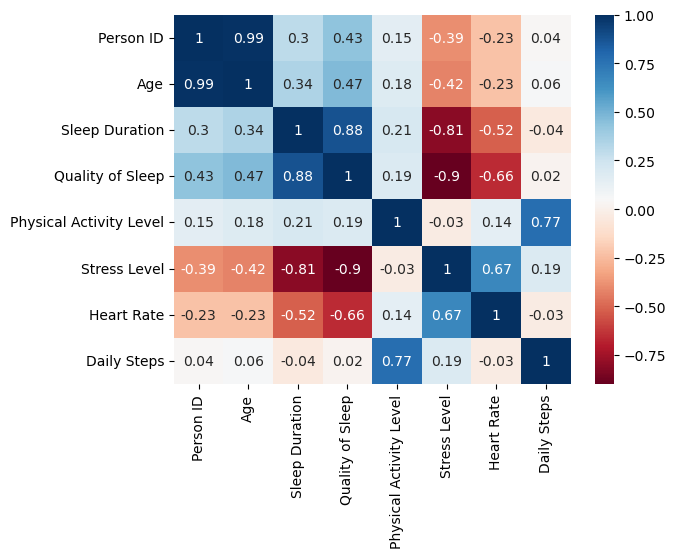

In [7]:
life_sleep_cor = round(life_sleep.corr(numeric_only=True),2)
sns.heatmap(life_sleep_cor,
            annot = True,
            cmap = 'RdBu')
plt.rcParams.update({'figure.dpi' : '120',
                    'figure.figsize' : [6.5,4.5]})

### 상관 행렬
수면 시간(Sleep Duration)과 수면의 질(Quality of Sleep) 간에는 0.88의 상관계수가 나타났으며, 이는 유의미한 양의 선형 상관관계를 의미합니다.  
즉, 수면 시간이 길어질수록 수면의 질 역시 높아지는 경향을 보였습니다.

## 3. 분석 내용 및 결과
### Q1. 수면의 질이 낮은사람은 수면시간이 짧은가?

In [10]:
life_sleep['Quality of Sleep'].isna().sum() 

np.int64(0)

In [11]:
life_sleep['Quality of Sleep'].value_counts()

Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64

In [12]:
Quality_mean = life_sleep['Quality of Sleep'].mean()
Quality_mean

np.float64(7.31283422459893)

In [13]:
life_sleep = life_sleep.assign(Quality_mean=(life_sleep['Quality of Sleep'].mean()))

In [14]:
life_sleep['Quality_value'] = np.where(life_sleep['Quality of Sleep'] >= life_sleep['Quality_mean'],'High_Quality','Low_Quality')
life_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_mean,Quality_value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,7.312834,Low_Quality
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,7.312834,Low_Quality
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,7.312834,Low_Quality
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,7.312834,Low_Quality
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,7.312834,Low_Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,7.312834,High_Quality
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,7.312834,High_Quality
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,7.312834,High_Quality
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,7.312834,High_Quality


#### T-test

In [15]:
from scipy import stats

high = life_sleep[life_sleep['Quality_value'] == 'High_Quality']['Sleep Duration']
low = life_sleep[life_sleep['Quality_value'] == 'Low_Quality']['Sleep Duration']

print("===== T-Test 결과 =====")
stats.ttest_ind(high, low, equal_var=True) #두 그룹 분산이 같다고 가정

===== T-Test 결과 =====


TtestResult(statistic=np.float64(20.65439370267199), pvalue=np.float64(1.0935953521145546e-63), df=np.float64(372.0))

#### T-Test결과
p-value가 0.05보다 작은 1.0935953521145546e-63 으로 나타났습니다.  
이는 두 그룹(High_Quality,Low_Quality)의 수면 시간 평균 차이가 유의미함을 의미합니다.

In [16]:
life_sleep = life_sleep.drop(columns=['Quality_mean'])

In [17]:
sleep_time = life_sleep.groupby('Quality_value',as_index = False)\
                       .agg(Sleep_time_value = ('Sleep Duration','mean'))\
                       .round(2)
sleep_time

,Quality_value,Sleep_time_value
0,High_Quality,7.74
1,Low_Quality,6.57


In [18]:
life_sleep = life_sleep.merge(sleep_time, on = 'Quality_value', how = 'left')
life_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,Sleep_time_value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Low_Quality,6.57
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low_Quality,6.57
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low_Quality,6.57
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,6.57
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,6.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,7.74
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,7.74
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,7.74
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,7.74


In [19]:
life_sleep['Sleep_time_value'] = np.where(life_sleep['Sleep_time_value'] >= life_sleep['Sleep Duration'],'Short_sleeper','Long_sleeper')
life_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,Sleep_time_value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Low_Quality,Short_sleeper
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low_Quality,Short_sleeper
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low_Quality,Short_sleeper
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_sleeper
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_sleeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_sleeper
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_sleeper
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_sleeper
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_sleeper


In [20]:
life_sleep['Quality_value'].value_counts()

Quality_value
Low_Quality     194
High_Quality    180
Name: count, dtype: int64

In [21]:
life_sleep.groupby(['Quality_value','Sleep_time_value'])\
            .agg(Ncount=('Sleep_time_value','count'))

Ncount
Quality_value Sleep_time_value        
High_Quality  Long_sleeper          93
              Short_sleeper         87
Low_Quality   Long_sleeper          72
              Short_sleeper        122

<Figure size 720x600 with 0 Axes>

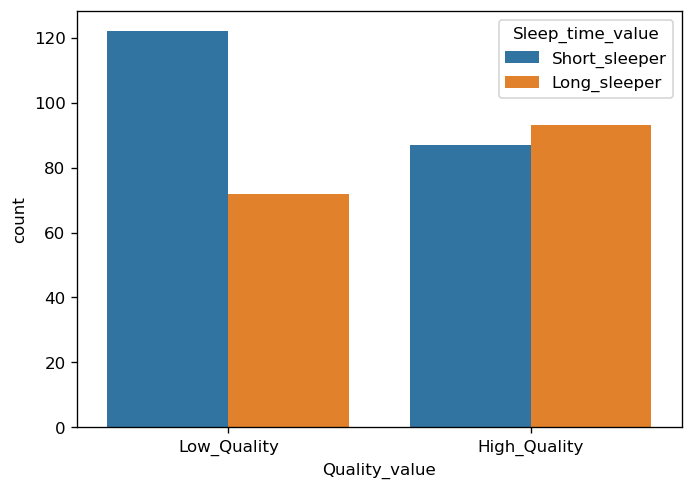

<Figure size 720x600 with 0 Axes>

In [22]:
sns.countplot(data = life_sleep,x = 'Quality_value',hue = 'Sleep_time_value')
plt.figure(figsize=(6,5))

<Figure size 720x600 with 0 Axes>

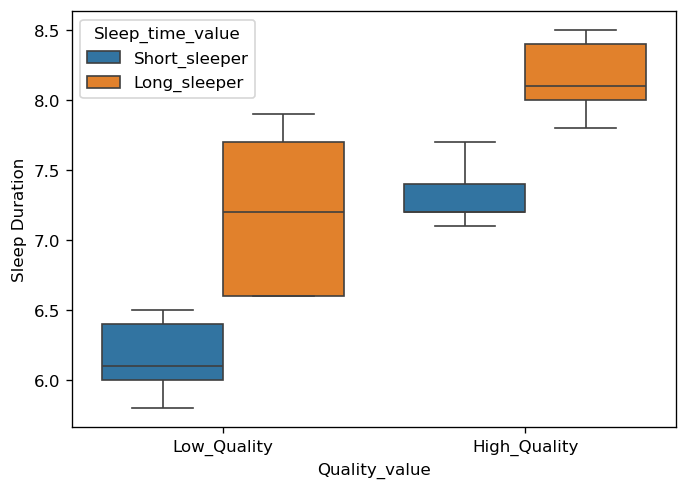

<Figure size 720x600 with 0 Axes>

In [23]:
sns.boxplot(data=life_sleep, x='Quality_value', y='Sleep Duration',hue = 'Sleep_time_value')
plt.figure(figsize=(6,5))

#### 결과

수면의 질 점수의 평균(약 7.3점)을 기준으로, 평균 미만을'Low_Quality'그룹으로, 평균 이상을 'High_Quality'그룹으로 분류했습니다.  
그룹별 평균 수면 시간을 비교한 결과 High_Quality 그룹은 평균 약 7.7시간, Low_Quality 그룹은 약 6.5시간으로 High_Quality 그룹이 약 1.2시간 더 긴 수면 시간을 가졌습니다.  
특히, Low_Quality 그룹(총 194명)의 약 63%(122명)가 전체 평균 수면 시간보다 짧은 것으로 확인되었습니다.  
이는 수면의 질이 낮은 그룹일수록 평균적으로 수면 시간 또한 짧은 경향을 보인다는 걸 알 수 있습니다.

### Q2.수면시간이 짧은사람은 스트레스가 많은가? 

In [24]:
life_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,Sleep_time_value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Low_Quality,Short_sleeper
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low_Quality,Short_sleeper
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low_Quality,Short_sleeper
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_sleeper
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_sleeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_sleeper
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_sleeper
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_sleeper
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_sleeper


In [24]:
life_sleep = life_sleep.drop(columns=['Sleep_time_value'])

In [25]:
life_sleep['Sleep Duration'].mean()

np.float64(7.132085561497325)

In [26]:
mean_sleep_duration = life_sleep['Sleep Duration'].mean()
life_sleep['sleep_duration_group'] = np.where(life_sleep['Sleep Duration'] < mean_sleep_duration,'Short_Sleeper','Long_Sleeper')
life_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,sleep_duration_group
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Low_Quality,Short_Sleeper
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low_Quality,Short_Sleeper
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Low_Quality,Short_Sleeper
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_Sleeper
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_Sleeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper


In [27]:
from scipy import stats

high_sleeper = life_sleep[life_sleep['sleep_duration_group'] == 'Long_Sleeper']['Stress Level']
low_sleeper = life_sleep[life_sleep['sleep_duration_group'] == 'Short_Sleeper']['Stress Level']

print("===== T-Test 결과 =====")
stats.ttest_ind(high_sleeper, low_sleeper, equal_var=True) #두 그룹 분산이 같다고 가정

===== T-Test 결과 =====


TtestResult(statistic=np.float64(-16.647078860070476), pvalue=np.float64(6.722720268157186e-47), df=np.float64(372.0))

#### T-Test결과
p-value가 0.05보다 작은 6.722720268157186e-4 으로 나타났습니다.  
이는 수면시간에 따른 두 그룹('Long_Sleeper', 'Short_Sleeper')간의 스트레스 차이가 유의미함을 의미합니다.

In [28]:
avg_sleep = life_sleep.groupby('sleep_duration_group',as_index = False)\
                    .agg(Avg = ('Stress Level','mean'))\
                    .round(2)
avg_sleep

,sleep_duration_group,Avg
0,Long_Sleeper,4.30
1,Short_Sleeper,6.63


In [29]:
Stress_count = life_sleep.groupby(['sleep_duration_group','Stress Level'],as_index = False)\
                         .agg(countN = ('Stress Level','count'))\
                         .sort_values(['sleep_duration_group','Stress Level'])
Stress_count

,sleep_duration_group,Stress Level,countN
0,Long_Sleeper,3,71
1,Long_Sleeper,4,33
2,Long_Sleeper,5,60
3,Long_Sleeper,6,36
4,Short_Sleeper,4,37
5,Short_Sleeper,5,7
6,Short_Sleeper,6,10
7,Short_Sleeper,7,50
8,Short_Sleeper,8,70


<Figure size 720x600 with 0 Axes>

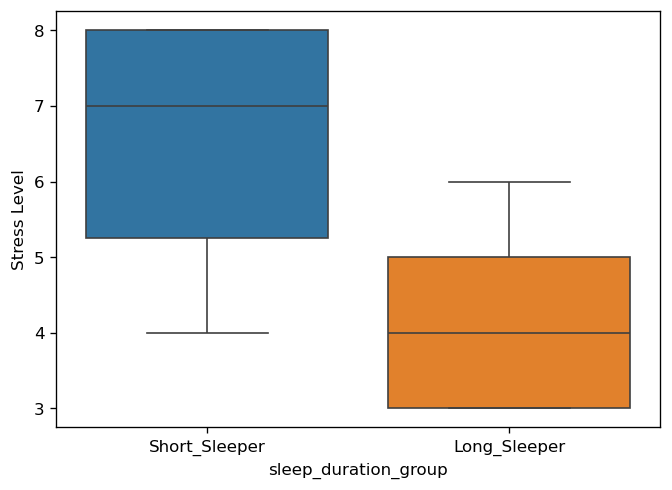

<Figure size 720x600 with 0 Axes>

In [30]:
sns.boxplot(data = life_sleep, x = 'sleep_duration_group' , y = 'Stress Level',hue = 'sleep_duration_group')
plt.figure(figsize=(6,5))

### 결과

상관 행렬 분석 결과 스트레스 수준(Stress Level)과 수면 시간(Sleep Duration) 간에는 -0.81의 상관계수가 나타났습니다. 이는 절댓값이 1에 가까운 음의 선형 상관관계를 의미하며, 스트레스 수준이 높아질수록 수면 시간이 짧아지는 경향을 보였습니다.
앞서 수면의 질이 낮은 그룹의 수면 시간이 짧다는 결과를 바탕으로, 수면 시간의 평균(약 7.1시간)을 기준으로 그룹을 재분류했습니다.  
평균보다 긴 수면 시간을 가진 그룹은 'Long_Sleeper'로, 평균보다 짧은 그룹은 'Short_Sleeper'로 구분하여 분석을 진행했습니다.
그룹 분류에 따른 스트레스 지수를 비교한 결과, Long_Sleeper 그룹의 평균 스트레스 지수는 약 4.3이었던 반면, Short_Sleeper 그룹의 평균 스트레스 지수는 약 6.6으로 Long_Sleeper 그룹에 비해 2.3가량 높게 나타났습니다.  
이는 수면시간이 긴 그룹 일수록 스트레스 지수가 낮다는 걸 알 수 있습니다.

### Q3. 수면 장애의 유무 및 유형이 수면에 영향을 주는가?

In [31]:
life_sleep['Sleep Disorder'].isna().sum()

np.int64(219)

In [32]:
life_sleep['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [33]:
life_sleep['Sleep Disorder'] = np.where(life_sleep['Sleep Disorder'].isna() , 'No Disorder',life_sleep['Sleep Disorder'])
life_sleep['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

수면 장애(Sleep Disorder)가 Nan값인 경우 수면 장애가 없다(No Disorder)로 가정하여 분석하였습니다.

In [34]:
disorder_types_only = life_sleep.copy()
disorder_types_only['Disorder_status'] = np.where(disorder_types_only['Sleep Disorder'] == 'No Disorder', 'No Disorder', 'Disorder')
disorder_types_only

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,sleep_duration_group,Disorder_status
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,Low_Quality,Short_Sleeper,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_Sleeper,Disorder
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_Sleeper,Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper,Disorder
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper,Disorder
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper,Disorder
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper,Disorder


### 3-1 수면 장애 유무에 따른 수면의 질, 수면시간, 스트레스 비교
#### 3-1-1 수면의 질의 차이

In [35]:
disorder_types_only.groupby('Disorder_status',as_index = False)\
                   .agg(Avg = ('Quality of Sleep','mean'))\
                   .round(2)

,Disorder_status,Avg
0,Disorder,6.87
1,No Disorder,7.63


In [36]:
disorder_types_only.groupby(['Disorder_status','Quality of Sleep'],as_index = False)\
                   .agg(cnt = ('Quality of Sleep','count'))

,Disorder_status,Quality of Sleep,cnt
0,Disorder,4,5
1,Disorder,5,7
2,Disorder,6,65
3,Disorder,7,37
4,Disorder,8,8
5,Disorder,9,33
6,No Disorder,6,40
7,No Disorder,7,40
8,No Disorder,8,101
9,No Disorder,9,38


<Figure size 720x600 with 0 Axes>

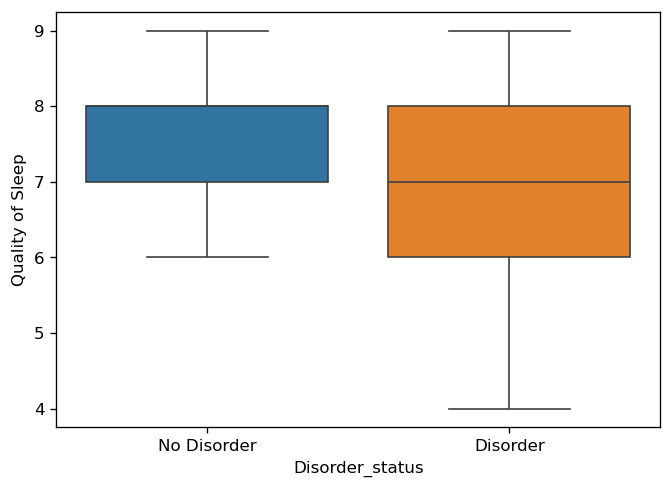

<Figure size 720x600 with 0 Axes>

In [46]:
sns.boxplot(data = disorder_types_only , x = 'Disorder_status', y = 'Quality of Sleep', hue = 'Disorder_status')
plt.figure(figsize=(6,5))

#### 3-1-2 수면 시간의 차이

In [38]:
disorder_types_only.groupby('Disorder_status',as_index = False)\
                   .agg(Avg = ('Sleep Duration','mean'))\
                   .round(2)

,Disorder_status,Avg
0,Disorder,6.81
1,No Disorder,7.36


<Figure size 720x600 with 0 Axes>

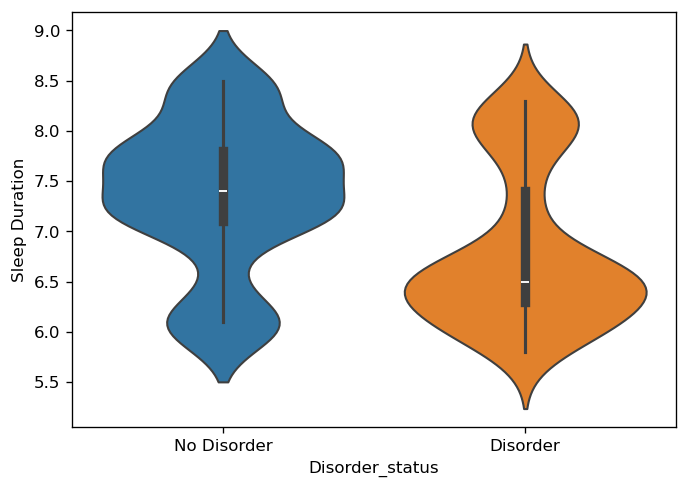

<Figure size 720x600 with 0 Axes>

In [53]:
sns.violinplot(data=disorder_types_only, x='Disorder_status', y='Sleep Duration', hue = 'Disorder_status')
plt.figure(figsize=(6,5))

<Figure size 720x600 with 0 Axes>

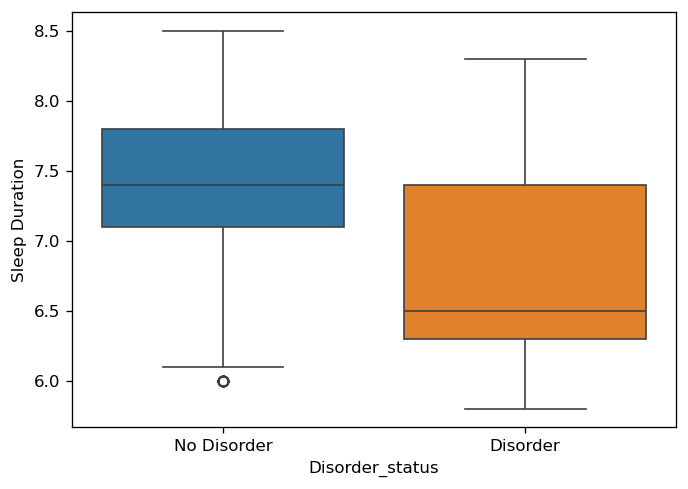

<Figure size 720x600 with 0 Axes>

In [47]:
sns.boxplot(data=disorder_types_only, x='Disorder_status', y='Sleep Duration', hue = 'Disorder_status')
plt.figure(figsize=(6,5))

#### 3-1-3 스트레스 차이

In [40]:
disorder_types_only.groupby('Disorder_status',as_index = False)\
                   .agg(Avg = ('Stress Level','mean'))\
                   .round(2)

,Disorder_status,Avg
0,Disorder,5.77
1,No Disorder,5.11


In [41]:
disorder_types_only.groupby(['Disorder_status','Stress Level'],as_index = False)\
                   .agg(cnt = ('Stress Level','count'))

,Disorder_status,Stress Level,cnt
0,Disorder,3,31
1,Disorder,4,27
2,Disorder,5,10
3,Disorder,6,3
4,Disorder,7,47
5,Disorder,8,37
6,No Disorder,3,40
7,No Disorder,4,43
8,No Disorder,5,57
9,No Disorder,6,43


<Figure size 720x600 with 0 Axes>

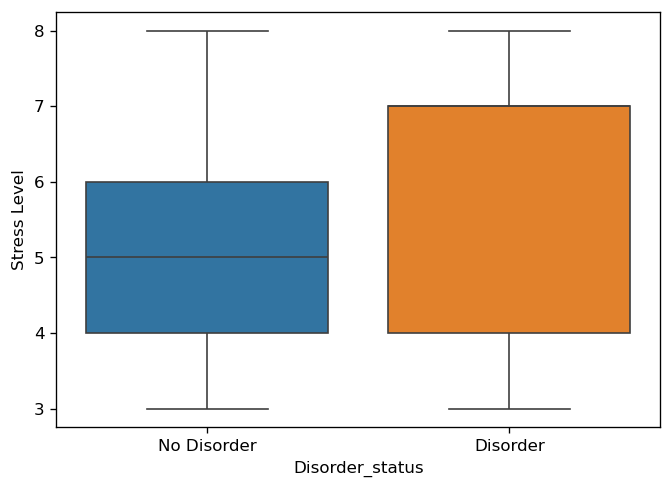

<Figure size 720x600 with 0 Axes>

In [44]:
sns.boxplot(data = disorder_types_only , x = 'Disorder_status', y = 'Stress Level', hue = 'Disorder_status')
plt.figure(figsize=(6,5))

### 분석결과

수면장애가 없는 그룹(No Disorder)의 평균 수면의 질 점수는 약 7.6으로, 수면장애가 있는 그룹(Disorder)의 평균 6.8점보다 0.8점 높게 나타났습니다.  
분포를 살펴보면 No Disorder 그룹(전체 219명) 중 약 41.4%(101명)가 수면의 질 점수 8점에 가장 많이 분포했습니다. 반면, Disorder 그룹(전체 155명)에서는 약 41.9%(65명)의 수면의 질 점수가 6점에 주로 분포하여, 두 그룹 간 2점의 차이가 있음을 보여줍니다.  
평균 수면 시간에서도 No Disorder 그룹은 평균 약 7.3시간으로 Disorder 그룹의 약 6.8시간보다 0.5시간 더 긴 것으로 나타났습니다.  
스트레스 지수 또한 No Disorder 그룹은 평균 5.1을 기록했으며, Disorder 그룹의 평균 5.7에 비해 약 0.6점 낮은 수치를 보였습니다.  
종합적으로 수면장애가 수면의 질과 수면 시간, 스트레스에 영향을 미칠 뿐 아니라, 수면 전반에 걸쳐 부정적인 영향을 미친다는 것을 보여줍니다.

#### 추가분석

In [44]:
pct75 = disorder_types_only.query('Disorder_status == "No Disorder"')['Sleep Duration'].quantile(.75)
pct25 = disorder_types_only.query('Disorder_status == "No Disorder"')['Sleep Duration'].quantile(.25)
iqr = pct75 - pct25
Lower_bound = pct25 - 1.5* iqr
round(Lower_bound,3)

np.float64(6.05)

In [45]:
disorder_types_only.query('`Sleep Duration` <= 6.05 & `Disorder_status` == "No Disorder"')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,sleep_duration_group,Disorder_status
13,14,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
14,15,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
15,16,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
52,53,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
54,55,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
55,56,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
57,58,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
58,59,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
60,61,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,No Disorder,Low_Quality,Short_Sleeper,No Disorder
61,62,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,No Disorder,Low_Quality,Short_Sleeper,No Disorder


### 결론

추가 분석 결과, 수면장애가 없는 그룹 내 수면 시간 분포에서 6.05시간 이하를 하위 이상치로 확인 후 정의했습니다.
기준 이하의 데이터를 추출하여 분석한 결과, 수면장애가 없음에도 불구하고 수면 시간이 짧은 사용자의 특징은 상당수가 의사 직업군이며, 이는 직업적 특성이 수면에 영향을 미칠 수 있음을 보여줍니다.

### 3-2. 수면 장애 유형별로 수면의 질,수면시간,스트레스를 비교
#### 3-2-1 수면의 질 비교

In [46]:
disorder_types = disorder_types_only.query('Disorder_status == "Disorder"')

In [141]:
disorder_types.groupby('Sleep Disorder',as_index = False)\
              .agg(Avg = ('Quality of Sleep','mean'))\
              .round(2)

,Sleep Disorder,Avg
0,Insomnia,6.53
1,Sleep Apnea,7.21


In [89]:
disorder_types.groupby(['Sleep Disorder','Quality of Sleep'])\
              .agg(cnt = ('Quality of Sleep','count'))

cnt
Sleep Disorder Quality of Sleep     
Insomnia       4                   1
               5                   4
               6                  32
               7                  34
               8                   5
               9                   1
Sleep Apnea    4                   4
               5                   3
               6                  33
               7                   3
               8                   3
               9                  32

<Figure size 720x600 with 0 Axes>

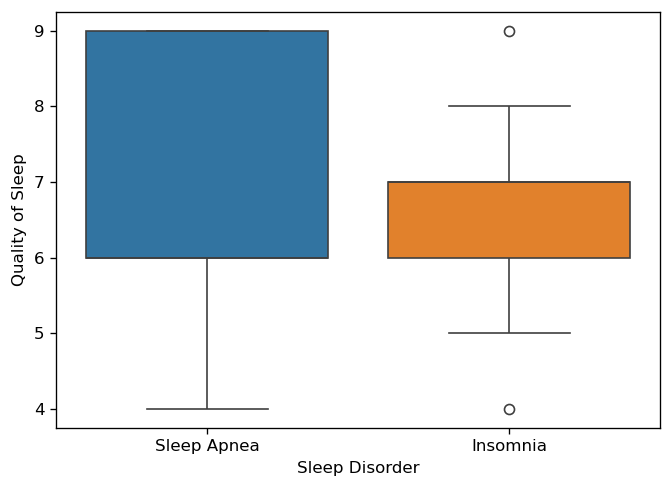

<Figure size 720x600 with 0 Axes>

In [91]:
sns.boxplot(data = disorder_types, x = 'Sleep Disorder', y = 'Quality of Sleep',hue = 'Sleep Disorder')
plt.figure(figsize=(6,5))

#### 3-2-2 수면 시간 비교

In [50]:
disorder_types.groupby('Sleep Disorder')['Sleep Duration'].value_counts().sort_index()

Sleep Disorder  Sleep Duration
Insomnia        5.9                1
                6.0                1
                6.1                1
                6.3               13
                6.4                7
                6.5               23
                6.6               17
                6.7                3
                6.8                3
                7.2                2
                7.3                2
                7.6                1
                7.8                2
                8.3                1
Sleep Apnea     5.8                2
                5.9                3
                6.0               13
                6.1               13
                6.2                3
                6.4                1
                6.5                2
                6.6                1
                6.8                2
                7.1                1
                7.2                1
                7.4                2
       

In [140]:
disorder_types.groupby('Sleep Disorder',as_index = False)\
              .agg(Avg = ('Sleep Duration','mean'))\
              .round(2)

,Sleep Disorder,Avg
0,Insomnia,6.59
1,Sleep Apnea,7.03


<Figure size 720x600 with 0 Axes>

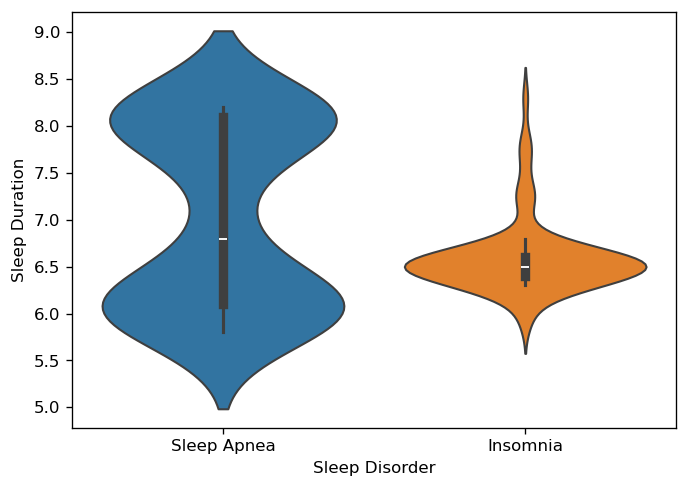

<Figure size 720x600 with 0 Axes>

In [52]:
sns.violinplot(data = disorder_types, x = 'Sleep Disorder', y = 'Sleep Duration', hue = 'Sleep Disorder')
plt.figure(figsize = (6,5))

#### 3-2-3 스트레스 비교

In [53]:
disorder_types.groupby('Sleep Disorder')\
              .agg(Avg = ('Stress Level','mean'))\
              .round(2)

,Avg
Sleep Disorder,
Insomnia,5.87
Sleep Apnea,5.67


In [129]:
disorder_index = disorder_types.groupby(['Sleep Disorder','Stress Level'],as_index = False)\
                               .agg(Stress_Count = ('Stress Level','count'))
disorder_index

,Sleep Disorder,Stress Level,Stress_Count
0,Insomnia,3,1
1,Insomnia,4,24
2,Insomnia,5,6
3,Insomnia,6,2
4,Insomnia,7,41
5,Insomnia,8,3
6,Sleep Apnea,3,30
7,Sleep Apnea,4,3
8,Sleep Apnea,5,4
9,Sleep Apnea,6,1


<Figure size 720x600 with 0 Axes>

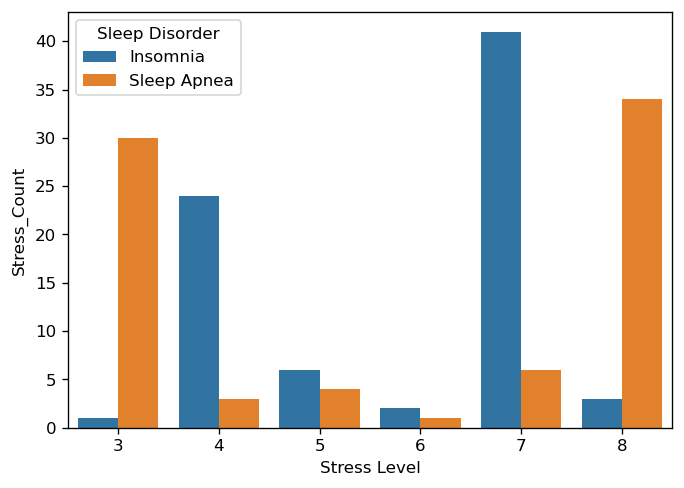

<Figure size 720x600 with 0 Axes>

In [130]:
sns.barplot(data = disorder_index, y = 'Stress_Count', x = 'Stress Level', hue = 'Sleep Disorder')
plt.figure(figsize=(6,5))

In [127]:
Sa_eight_analyze = disorder_types.query('(`Sleep Disorder` == "Sleep Apnea") & (`Stress Level` == 8)')\
              .head()
Sa_eight_analyze

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,sleep_duration_group,Disorder_status
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_Sleeper,Disorder
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Low_Quality,Short_Sleeper,Disorder
17,18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea,Low_Quality,Short_Sleeper,Disorder
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,Low_Quality,Short_Sleeper,Disorder
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,Low_Quality,Short_Sleeper,Disorder


In [128]:
Sa_three_analyze = disorder_types.query('(`Sleep Disorder` == "Sleep Apnea") & (`Stress Level` == 3)')\
              .head()
Sa_three_analyze

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,sleep_duration_group,Disorder_status
276,277,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea,High_Quality,Long_Sleeper,Disorder
277,278,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea,High_Quality,Long_Sleeper,Disorder
344,345,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper,Disorder
345,346,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper,Disorder
346,347,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High_Quality,Long_Sleeper,Disorder


In [126]:
In_seven_analyze = disorder_types.query('(`Sleep Disorder` == "Insomnia") & (`Stress Level` == 7)')\
              .head()
In_seven_analyze

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,sleep_duration_group,Disorder_status
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,Low_Quality,Short_Sleeper,Disorder
18,19,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia,Low_Quality,Short_Sleeper,Disorder
31,32,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Insomnia,Low_Quality,Short_Sleeper,Disorder
105,106,Male,36,Teacher,6.6,5,35,7,Overweight,129/84,74,4800,Insomnia,Low_Quality,Short_Sleeper,Disorder
147,148,Male,39,Engineer,6.5,5,40,7,Overweight,132/87,80,4000,Insomnia,Low_Quality,Short_Sleeper,Disorder


In [125]:
In_Four_analyze = disorder_types.query('(`Sleep Disorder` == "Insomnia") & (`Stress Level` == 4)')\
              .head()
In_Four_analyze

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Quality_value,sleep_duration_group,Disorder_status
94,95,Female,36,Accountant,7.2,8,60,4,Normal,115/75,68,7000,Insomnia,High_Quality,Long_Sleeper,Disorder
186,187,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia,Low_Quality,Short_Sleeper,Disorder
188,189,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia,Low_Quality,Short_Sleeper,Disorder
190,191,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia,Low_Quality,Short_Sleeper,Disorder
220,221,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia,Low_Quality,Short_Sleeper,Disorder


### 결론

수면의 질은 수면무호흡증(Sleep Apnea) 그룹이 평균 7.2로, 불면증(Insomnia) 그룹의 평균 6.5보다 높게 나타났습니다. 분포를 살펴보면, 수면무호흡증 그룹은 수면 질 점수가 주로 6과 9에 집중된 반면, 불면증 그룹은 6에서 7 사이에 많이 분포하는 경향을 보였습니다.  
수면 무호흡증이 있는 그룹의 평균 수면 시간은 약 7시간으로, 불면증이 있는 그룹의 약 6.5시간보다 0.5시간 더 길었습니다. 또한 수면무호흡증 그룹은 6시간과 8시간대에 인원이 많이 분포한 반면, 불면증 그룹은 6시간대에 주로 분포하는 특징이 있었습니다.  
스트레스 수준을 비교해보면, 불면증 그룹의 평균 스트레스 지수는 약 5.87로, 수면무호흡증 그룹의 약 5.67보다 다소 높았습니다. 또한 수면무호흡증 그룹은 스트레스 지수가 3과 8에 주로 분포했으나, 불면증 그룹은 4와 7에 많이 분포하는 경향이 관찰되었습니다.  
이러한 결과를 통해 수면장애가 있는 그룹 내에서 특히 불면증이 있는 사람들의 수면 상태가 더 어렵고 스트레스 수준도 상대적으로 높다는 점을 알 수 있습니다.


## Q4. 직업

In [139]:
Occupation_Quality = life_sleep.groupby(['Quality_value','Occupation'])\
                                   .agg(Occupation_Count = ('Occupation','count'))\
                                   .sort_values(['Quality_value','Occupation_Count'],ascending = False)
top_3_occupations = Occupation_Quality.groupby(level=0)\
                                      .head(3)
top_3_occupations

Occupation_Count
Quality_value Occupation                  
Low_Quality   Doctor                    67
              Nurse                     38
              Teacher                   34
High_Quality  Engineer                  60
              Lawyer                    42
              Nurse                     35

<Axes: xlabel='Cnt', ylabel='Occupation'>

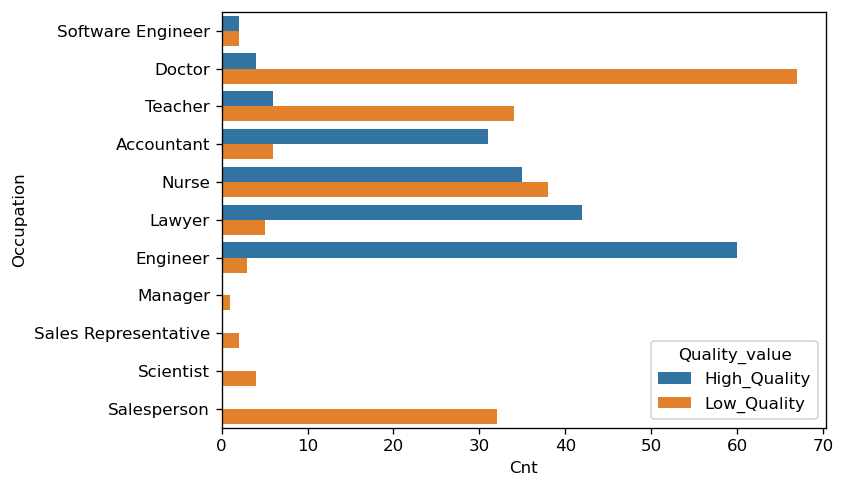

In [62]:
sns.barplot(data = Occupation_Quality , x= 'Cnt', y = 'Occupation' , hue = 'Quality_value')

## 결론

분석 결과, 개인의 수면의 질은 수면 시간, 스트레스 수준과 같은 핵심 요인에 의해 크게 영향을 받으며, 수면장애의 유무 또한 중요한 변수로 작용함이 확인되었습니다.
특히, 직업군 별로 수면의 질을 비교한 결과 기술자 직업군에서 가장 높은 수면의 질이 기록된 반면, 의사 직업군에서는 가장 낮은 수면의 질이 확인되었습니다.  
이러한 분석은 개인의 수면 건강 개선을 위한 맞춤형 전략 수립 시 수면 시간, 스트레스 관리, 그리고 특정 직업 환경을 고려하는 것이 중요함을 알 수 있습니다.